In [8]:
from pandas import read_csv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
# load dataset

In [400]:
from __future__ import print_function
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import utils
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dropout
import time

In [289]:
def prepare(data):
    X = data[:, :-1]
    if len(X.shape) == 1: X = X.reshape(-1, 1)
    y = data[:, -1].reshape(-1, 1)

    # We normalize both X and y with MinMaxScaler()
    scaler_x = MinMaxScaler(feature_range=(-1, 1))
    scaler_y = MinMaxScaler(feature_range=(-1, 1))
    scaler_x.fit(X)
    scaler_y.fit(y)
    X = scaler_x.transform(X)
    y = scaler_y.transform(y)
    X_1, X_2, y_1, y_2 = train_test_split(X, y, test_size=0.2, random_state=33)
    return X_1, X_2, y_1, y_2

In [95]:
def r_square(y_test, y_pred):
    y1=np.mean(y_test)
    SSR = np.sum((y_pred-y1)**2)/len(y_test)
    SST = np.sum((y_test-y1)**2)/len(y_test)
    return SSR/SST

In [235]:
data = np.loadtxt('/Users/messivan/Downloads/Data/higdon.txt')

X = data[:,:-1]
if len(X.shape) == 1: X = X.reshape(-1,1)
y = data[:,-1].reshape(-1,1)

# We normalize both X and y with MinMaxScaler()
scaler_x = MinMaxScaler(feature_range=(-1, 1))
scaler_y = MinMaxScaler(feature_range=(-1, 1))
scaler_x.fit(X)
scaler_y.fit(y)
X = scaler_x.transform(X)
y = scaler_y.transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

In [409]:
def RMSE(y_pred,y_test):
    RMSE=np.sqrt(np.sum((y_pred-y_test)**2)/len(y_pred))
    return RMSE

### DNN regression

### Nasa

In [367]:
data = np.loadtxt('/Users/messivan/Downloads/Data/nasa.txt')
X_train, X_test, y_train, y_test=prepare(data)
model = Sequential()
model.add(Dense(64, input_shape=(3,)))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.add(Dense(1))

#  chose the adam optimiser in the OPTIMIZER variable definition  
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

#show the model summary
model.summary()


Model: "sequential_142"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_420 (Dense)           (None, 64)                256       
                                                                 
 activation_57 (Activation)  (None, 64)                0         
                                                                 
 dropout_8 (Dropout)         (None, 64)                0         
                                                                 
 dense_421 (Dense)           (None, 32)                2080      
                                                                 
 dense_422 (Dense)           (None, 10)                330       
                                                                 
 dense_423 (Dense)           (None, 1)                 11        
                                                                 
Total params: 2,677
Trainable params: 2,677
Non-trai

In [401]:
t1=time.time()
history=model.fit(X_train,y_train,epochs=200, validation_split=0.1)
t2=time.time()
print(t2-t1)

Epoch 1/200
23/23 [==============================] - 0s 7ms/step - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0197 - val_mse: 0.0197
Epoch 2/200
23/23 [==============================] - 0s 3ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0194 - val_mse: 0.0194
Epoch 3/200
23/23 [==============================] - 0s 3ms/step - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0191 - val_mse: 0.0191
Epoch 4/200
23/23 [==============================] - 0s 3ms/step - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0193 - val_mse: 0.0193
Epoch 5/200
23/23 [==============================] - 0s 3ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0193 - val_mse: 0.0193
Epoch 6/200
23/23 [==============================] - 0s 3ms/step - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0193 - val_mse: 0.0193
Epoch 7/200
23/23 [==============================] - 0s 3ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0190 - val_mse: 0.0190
Epoch 8/200
23/23 [==============================] - 0s 3ms/step - loss: 0.0177 - m

Epoch 125/200
23/23 [==============================] - 0s 2ms/step - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0185 - val_mse: 0.0185
Epoch 126/200
23/23 [==============================] - 0s 2ms/step - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0185 - val_mse: 0.0185
Epoch 127/200
23/23 [==============================] - 0s 3ms/step - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0187 - val_mse: 0.0187
Epoch 128/200
23/23 [==============================] - 0s 3ms/step - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0183 - val_mse: 0.0183
Epoch 129/200
23/23 [==============================] - 0s 3ms/step - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0188 - val_mse: 0.0188
Epoch 130/200
23/23 [==============================] - 0s 2ms/step - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0185 - val_mse: 0.0185
Epoch 131/200
23/23 [==============================] - 0s 3ms/step - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0185 - val_mse: 0.0185
Epoch 132/200
23/23 [==============================] - 0s 2ms/step - 

In [402]:
history.history.keys()

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])

Text(0.5, 1.0, 'Nasa')

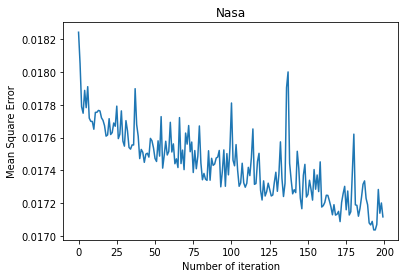

In [405]:
plt.plot(history.history['mse'])
plt.xlabel('Number of iteration')
plt.ylabel('Mean Square Error')
plt.title('Nasa')

In [406]:
y_pred=model.predict(X_test)
r_square(y_test,y_pred)

0.9568716598055128

In [411]:
RMSE(y_pred=y_pred,y_test=y_test)

0.1355219348977183

### Motorcycle

In [474]:
data = np.loadtxt('/Users/messivan/Downloads/Data/motorcycle.txt')
X_train, X_test, y_train, y_test=prepare(data)

In [475]:
model = Sequential()
model.add(Dense(64, input_shape=(1,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.add(Dense(1))


model.compile(optimizer='Adam', loss='mse', metrics=['mse'])

#show the model summary
model.summary()


Model: "sequential_152"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_467 (Dense)           (None, 64)                128       
                                                                 
 activation_67 (Activation)  (None, 64)                0         
                                                                 
 dropout_15 (Dropout)        (None, 64)                0         
                                                                 
 dense_468 (Dense)           (None, 32)                2080      
                                                                 
 dense_469 (Dense)           (None, 10)                330       
                                                                 
 dense_470 (Dense)           (None, 1)                 11        
                                                                 
Total params: 2,549
Trainable params: 2,549
Non-trai

In [476]:
t1=time.time()
history=model.fit(X_train,y_train,epochs=200, validation_split=0.1)
t2=time.time()
t2-t1

Epoch 1/200
3/3 [==============================] - 0s 61ms/step - loss: 0.2098 - mse: 0.2098 - val_loss: 0.3457 - val_mse: 0.3457
Epoch 2/200
3/3 [==============================] - 0s 13ms/step - loss: 0.2075 - mse: 0.2075 - val_loss: 0.3456 - val_mse: 0.3456
Epoch 3/200
3/3 [==============================] - 0s 12ms/step - loss: 0.2047 - mse: 0.2047 - val_loss: 0.3458 - val_mse: 0.3458
Epoch 4/200
3/3 [==============================] - 0s 15ms/step - loss: 0.2028 - mse: 0.2028 - val_loss: 0.3458 - val_mse: 0.3458
Epoch 5/200
3/3 [==============================] - 0s 12ms/step - loss: 0.2011 - mse: 0.2011 - val_loss: 0.3461 - val_mse: 0.3461
Epoch 6/200
3/3 [==============================] - 0s 12ms/step - loss: 0.1985 - mse: 0.1985 - val_loss: 0.3455 - val_mse: 0.3455
Epoch 7/200
3/3 [==============================] - 0s 13ms/step - loss: 0.1981 - mse: 0.1981 - val_loss: 0.3446 - val_mse: 0.3446
Epoch 8/200
3/3 [==============================] - 0s 14ms/step - loss: 0.1956 - mse: 0.19

3/3 [==============================] - 0s 16ms/step - loss: 0.0580 - mse: 0.0580 - val_loss: 0.0710 - val_mse: 0.0710
Epoch 126/200
3/3 [==============================] - 0s 16ms/step - loss: 0.0605 - mse: 0.0605 - val_loss: 0.0699 - val_mse: 0.0699
Epoch 127/200
3/3 [==============================] - 0s 11ms/step - loss: 0.0611 - mse: 0.0611 - val_loss: 0.0695 - val_mse: 0.0695
Epoch 128/200
3/3 [==============================] - 0s 9ms/step - loss: 0.0621 - mse: 0.0621 - val_loss: 0.0702 - val_mse: 0.0702
Epoch 129/200
3/3 [==============================] - 0s 11ms/step - loss: 0.0611 - mse: 0.0611 - val_loss: 0.0708 - val_mse: 0.0708
Epoch 130/200
3/3 [==============================] - 0s 11ms/step - loss: 0.0646 - mse: 0.0646 - val_loss: 0.0720 - val_mse: 0.0720
Epoch 131/200
3/3 [==============================] - 0s 10ms/step - loss: 0.0600 - mse: 0.0600 - val_loss: 0.0719 - val_mse: 0.0719
Epoch 132/200
3/3 [==============================] - 0s 10ms/step - loss: 0.0631 - mse: 0.0

6.4422478675842285

Text(0.5, 1.0, 'MotorCycle')

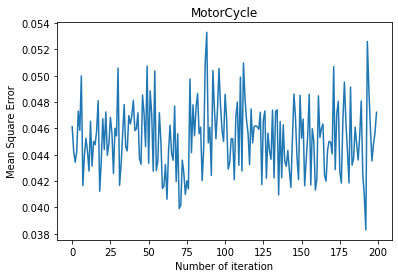

In [422]:
plt.plot(history.history['mse'])
plt.xlabel('Number of iteration')
plt.ylabel('Mean Square Error')
plt.title('MotorCycle')

In [477]:
y_pred=model.predict(X_test)

Text(0.5, 1.0, 'Motorcycle')

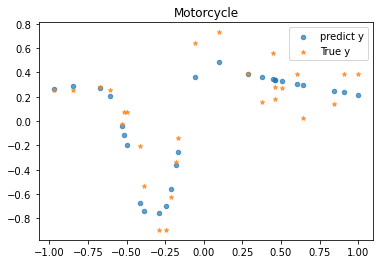

In [480]:
plt.scatter(X_test,y_pred,s=20,alpha=0.7)
plt.scatter(X_test,y_test,s=20,marker='*',alpha=0.7)
plt.legend(['predict y','True y'],loc=1)
plt.title('Motorcycle')

In [426]:
r_square(y_test,y_pred)

0.9512168126473785

In [427]:
RMSE(y_pred,y_test)

0.1853454563926072

### Higdon

In [481]:
data = np.loadtxt('/Users/messivan/Downloads/Data/higdon.txt')
X_train, X_test, y_train, y_test=prepare(data)

In [489]:
model = Sequential()

# Dense layer for all to all connections
# Define the output layer with 10 output units, and softmax activation as categorical output
model.add(Dense(64, input_shape=(1,)))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.add(Dense(1))

#  chose the adam optimiser in the OPTIMIZER variable definition  
model.compile(optimizer='Adam', loss='mse', metrics=['mse'])

#show the model summary
model.summary()


Model: "sequential_154"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_476 (Dense)           (None, 64)                128       
                                                                 
 activation_69 (Activation)  (None, 64)                0         
                                                                 
 dropout_17 (Dropout)        (None, 64)                0         
                                                                 
 dense_477 (Dense)           (None, 32)                2080      
                                                                 
 dense_478 (Dense)           (None, 16)                528       
                                                                 
 dense_479 (Dense)           (None, 10)                170       
                                                                 
 dense_480 (Dense)           (None, 1)              

In [490]:
t1=time.time()
history=model.fit(X_train,y_train,epochs=200, validation_split=0.2)
t2=time.time()
t2-t1

Epoch 1/200
20/20 [==============================] - 1s 8ms/step - loss: 0.4030 - mse: 0.4030 - val_loss: 0.3687 - val_mse: 0.3687
Epoch 2/200
20/20 [==============================] - 0s 3ms/step - loss: 0.3342 - mse: 0.3342 - val_loss: 0.3007 - val_mse: 0.3007
Epoch 3/200
20/20 [==============================] - 0s 2ms/step - loss: 0.2452 - mse: 0.2452 - val_loss: 0.2455 - val_mse: 0.2455
Epoch 4/200
20/20 [==============================] - 0s 2ms/step - loss: 0.2027 - mse: 0.2027 - val_loss: 0.2296 - val_mse: 0.2296
Epoch 5/200
20/20 [==============================] - 0s 2ms/step - loss: 0.1842 - mse: 0.1842 - val_loss: 0.2047 - val_mse: 0.2047
Epoch 6/200
20/20 [==============================] - 0s 2ms/step - loss: 0.1644 - mse: 0.1644 - val_loss: 0.1842 - val_mse: 0.1842
Epoch 7/200
20/20 [==============================] - 0s 2ms/step - loss: 0.1474 - mse: 0.1474 - val_loss: 0.1658 - val_mse: 0.1658
Epoch 8/200
20/20 [==============================] - 0s 3ms/step - loss: 0.1317 - m

Epoch 125/200
20/20 [==============================] - 0s 2ms/step - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0155 - val_mse: 0.0155
Epoch 126/200
20/20 [==============================] - 0s 3ms/step - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0156 - val_mse: 0.0156
Epoch 127/200
20/20 [==============================] - 0s 3ms/step - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0156 - val_mse: 0.0156
Epoch 128/200
20/20 [==============================] - 0s 3ms/step - loss: 0.0184 - mse: 0.0184 - val_loss: 0.0156 - val_mse: 0.0156
Epoch 129/200
20/20 [==============================] - 0s 2ms/step - loss: 0.0185 - mse: 0.0185 - val_loss: 0.0155 - val_mse: 0.0155
Epoch 130/200
20/20 [==============================] - 0s 3ms/step - loss: 0.0184 - mse: 0.0184 - val_loss: 0.0155 - val_mse: 0.0155
Epoch 131/200
20/20 [==============================] - 0s 2ms/step - loss: 0.0187 - mse: 0.0187 - val_loss: 0.0157 - val_mse: 0.0157
Epoch 132/200
20/20 [==============================] - 0s 2ms/step - 

10.87396502494812

In [484]:
print(history.history.keys())

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


Text(0.5, 1.0, 'Higdon')

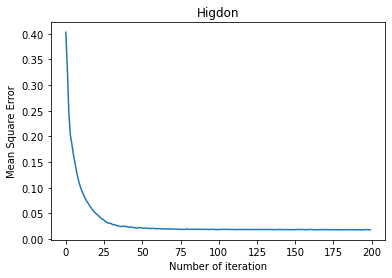

In [491]:
plt.plot(history.history['mse'])
plt.xlabel('Number of iteration')
plt.ylabel('Mean Square Error')
plt.title('Higdon')

In [492]:
y_pred=model.predict(X_test)

Text(0.5, 1.0, 'Higdon')

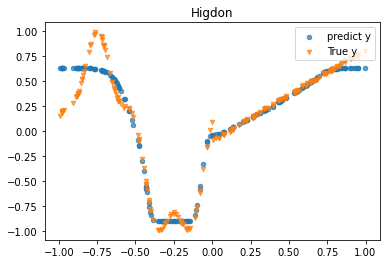

In [493]:
plt.scatter(X_test,y_pred,s=20,alpha=0.7)
plt.scatter(X_test,y_test,s=20,marker='v',alpha=0.7)
plt.legend(['predict y','True y'],loc=1)
plt.title('Higdon')

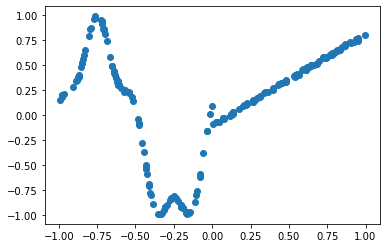

In [494]:
plt.scatter(X_test,y_test)

In [495]:
r_square(y_test,y_pred)

0.9573567484235604

In [496]:
RMSE(y_pred,y_test)

0.13483442346418445

### Bernholdt

In [500]:
data = np.loadtxt('/Users/messivan/Downloads/Data/bernholdt.txt')
X_train, X_test, y_train, y_test=prepare(data)

In [501]:
model = Sequential()

# Dense layer for all to all connections
# Define the output layer with 10 output units, and softmax activation as categorical output
model.add(Dense(64, input_shape=(2,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.add(Dense(1))

# we previously chose the adam optimiser in the OPTIMIZER variable definition  
model.compile(optimizer='Adam', loss='mse', metrics=['mse'])

#show the model summary
model.summary()

Model: "sequential_156"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_486 (Dense)           (None, 64)                192       
                                                                 
 activation_71 (Activation)  (None, 64)                0         
                                                                 
 dropout_19 (Dropout)        (None, 64)                0         
                                                                 
 dense_487 (Dense)           (None, 32)                2080      
                                                                 
 dense_488 (Dense)           (None, 16)                528       
                                                                 
 dense_489 (Dense)           (None, 10)                170       
                                                                 
 dense_490 (Dense)           (None, 1)              

In [502]:
t1=time.time()
history=model.fit(X_train,y_train,epochs=200, validation_split=0.2)
t2=time.time()
t2-t1

Epoch 1/200
200/200 [==============================] - 1s 2ms/step - loss: 0.2995 - mse: 0.2995 - val_loss: 0.2105 - val_mse: 0.2105
Epoch 2/200
200/200 [==============================] - 0s 2ms/step - loss: 0.1841 - mse: 0.1841 - val_loss: 0.1771 - val_mse: 0.1771
Epoch 3/200
200/200 [==============================] - 0s 1ms/step - loss: 0.1462 - mse: 0.1462 - val_loss: 0.1311 - val_mse: 0.1311
Epoch 4/200
200/200 [==============================] - 0s 1ms/step - loss: 0.1260 - mse: 0.1260 - val_loss: 0.1199 - val_mse: 0.1199
Epoch 5/200
200/200 [==============================] - 0s 1ms/step - loss: 0.1154 - mse: 0.1154 - val_loss: 0.1087 - val_mse: 0.1087
Epoch 6/200
200/200 [==============================] - 0s 1ms/step - loss: 0.1057 - mse: 0.1057 - val_loss: 0.1052 - val_mse: 0.1052
Epoch 7/200
200/200 [==============================] - 0s 1ms/step - loss: 0.1024 - mse: 0.1024 - val_loss: 0.0905 - val_mse: 0.0905
Epoch 8/200
200/200 [==============================] - 0s 2ms/step - 

200/200 [==============================] - 0s 2ms/step - loss: 0.0183 - mse: 0.0183 - val_loss: 0.0130 - val_mse: 0.0130
Epoch 124/200
200/200 [==============================] - 0s 2ms/step - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0244 - val_mse: 0.0244
Epoch 125/200
200/200 [==============================] - 0s 2ms/step - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 126/200
200/200 [==============================] - 0s 2ms/step - loss: 0.0131 - mse: 0.0131 - val_loss: 0.0089 - val_mse: 0.0089
Epoch 127/200
200/200 [==============================] - 0s 2ms/step - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0125 - val_mse: 0.0125
Epoch 128/200
200/200 [==============================] - 0s 2ms/step - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0277 - val_mse: 0.0277
Epoch 129/200
200/200 [==============================] - 0s 2ms/step - loss: 0.0161 - mse: 0.0161 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 130/200
200/200 [==============================] - 0s 2ms/step 

Epoch 184/200
200/200 [==============================] - 0s 2ms/step - loss: 0.0125 - mse: 0.0125 - val_loss: 0.0224 - val_mse: 0.0224
Epoch 185/200
200/200 [==============================] - 0s 2ms/step - loss: 0.0247 - mse: 0.0247 - val_loss: 0.0086 - val_mse: 0.0086
Epoch 186/200
200/200 [==============================] - 0s 2ms/step - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0082 - val_mse: 0.0082
Epoch 187/200
200/200 [==============================] - 0s 1ms/step - loss: 0.0102 - mse: 0.0102 - val_loss: 0.0106 - val_mse: 0.0106
Epoch 188/200
200/200 [==============================] - 0s 1ms/step - loss: 0.0091 - mse: 0.0091 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 189/200
200/200 [==============================] - 0s 1ms/step - loss: 0.0096 - mse: 0.0096 - val_loss: 0.0068 - val_mse: 0.0068
Epoch 190/200
200/200 [==============================] - 0s 1ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 191/200
200/200 [==============================] 

64.67690324783325

Text(0.5, 1.0, 'Bernholdt')

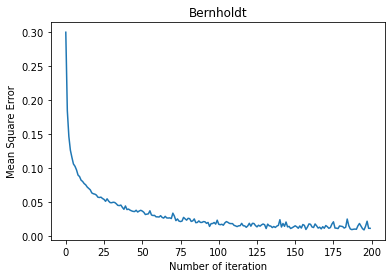

In [505]:
plt.plot(history.history['mse'])
plt.xlabel('Number of iteration')
plt.ylabel('Mean Square Error')
plt.title('Bernholdt')

In [506]:
y_pred=model.predict(X_test)
r_square(y_test,y_pred)

0.9516885679908885

In [507]:
RMSE(y_pred,y_test)

0.07974246438085661

# data

In [78]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Motorcylcle')

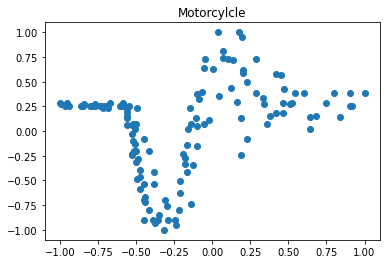

In [165]:
plt.scatter(X,y)
plt.title('Motorcylcle')

In [167]:
data = np.loadtxt('/Users/messivan/Downloads/Data/higdon.txt')

X = data[:,:-1]
if len(X.shape) == 1: X = X.reshape(-1,1)
y = data[:,-1].reshape(-1,1)

Text(0.5, 1.0, 'Higdon')

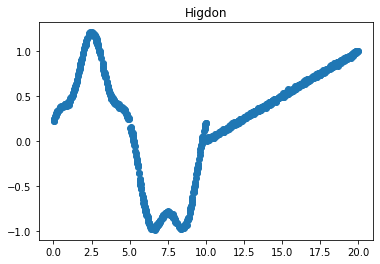

In [168]:
plt.scatter(X,y)# higdon
plt.title('Higdon')

In [82]:
data = np.loadtxt('/Users/messivan/Downloads/Data/bernholdt.txt')
x=data[:,0]
y=data[:,1]
z=data[:,2]

/var/folders/1l/582w_g7n4qd5_pz3c9_2b15m0000gn/T/ipykernel_8596/1965762457.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig) # 将画布作用于 Axes3D 对象上。


Text(0.5, 0, 'z')

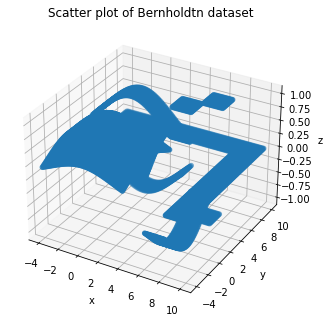

In [90]:

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig) #

ax.scatter(x,y,z) # 
ax.set_title('Scatter plot of Bernholdtn dataset')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

In [91]:

def wider_model():
	# create model
	model = Sequential()
	model.add(Dense(50, input_shape=(1,), kernel_initializer='normal', activation='sigmoid'))
	model.add(Dense(25, kernel_initializer='normal', activation='softmax'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model

# evaluate model with standardized dataset
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(model=wider_model, epochs=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10)
#results = cross_val_score(pipeline, X,y, cv=kfold, scoring='neg_mean_squared_error')
print("Wider: %.2f (%.2f) MSE" % (results.mean(), results.std()))


Wider: -0.18 (0.16) MSE
